# Customer Churn Analytics & Predictions

### Introduction

#### Data Introduction 
The dataset was published [Ankit Verma](https://www.kaggle.com/ankitverma2010) on Kaggle. The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

##### Problem Statements 
Because we lack of detail information about the dataset that we have. We can only synthesize and hypothesize about this. This is not reflecting on a real condition of any company. 
- Business Context : Company X (E-commerce company) facing a hard battle with competitor because many of Company X's customers turn into competitor's customers so then increasing Company X's customer retention rate. Top level management urged the data team to analyze which factor that influencing customer retention and create a machine learning model that could integrated into Company X's information system so they could improve customer satisfaction and win the battle.
- Data Availability : Data consists of customer X demography and purchasing behaviour  
- Problem Definition : The problem is to give insight what factor caused increasung number of customer leaving and develop machine learning model to predict customer retention
- Performance Metrics : The model performance will evaluated using ROC.The project will counted as 'Succes' if AUC ROC score reaching 0.75
- Stakeholders : All elements that related to Company X that consists of Stakeholder, Company X and Company X's customer

#### Objectives
1. Identifying Which factors most influencing customer retention 
2. Training a machine learning model that could reach minimum ROC AUC score 0.75
3. Give insights and recommendation to Company's X top management 

### Data Exploration 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np 
from numpy import percentile, argmax
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, classification_report, roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# access the dataset 
df = pd.read_excel(r'/content/drive/MyDrive/Data/E Commerce Dataset.xlsx', sheet_name = 'E Comm')

In [4]:
# check general information about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
# Check 10 first rows of dataset
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [6]:
# Initialize lists to store categorical and numerical features
catfeat = []
numfeat = []

# Loop over the columns in the DataFrame
for i in df.columns:
  # Check the data type of the column
  if(df[i].dtypes == 'object'):
    # Append column name to list of categorical features
    catfeat.append(i)
  else:
    # Append column name to list of numerical features
    numfeat.append(i)

# Print the number of categorical and numerical features
print(f'The Number of Object Features : {len(catfeat)}')
print(f'The Number of Numerical Features : {len(numfeat)}')


The Number of Object Features : 5
The Number of Numerical Features : 15


In [7]:
# Use the describe() method to generate descriptive statistics
# Transpose the result using the T attribute to make it easier to read
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


#### Check Outliers

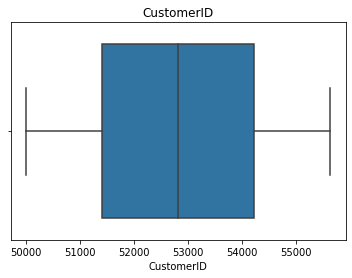

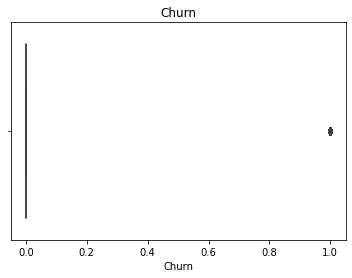

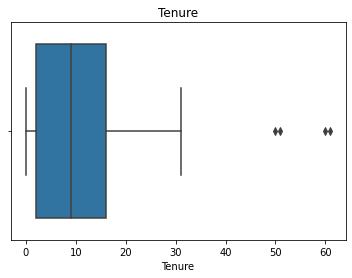

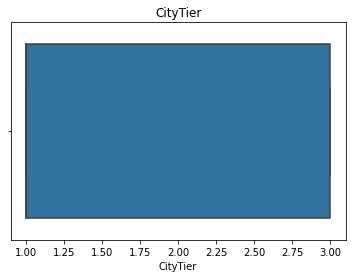

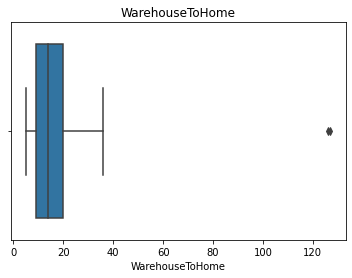

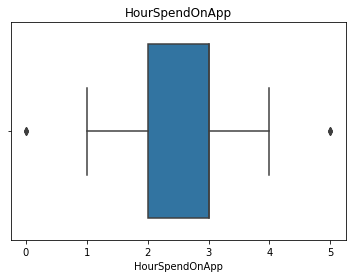

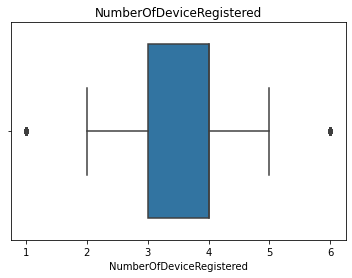

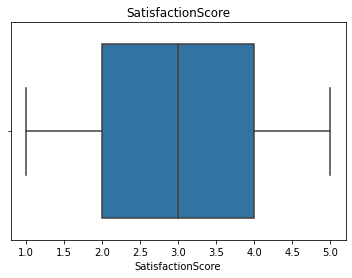

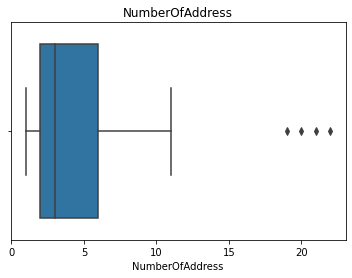

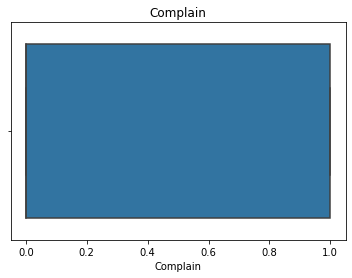

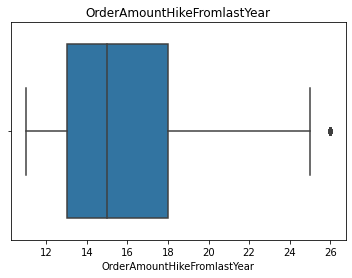

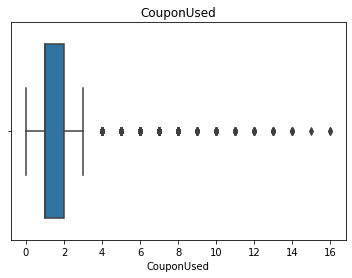

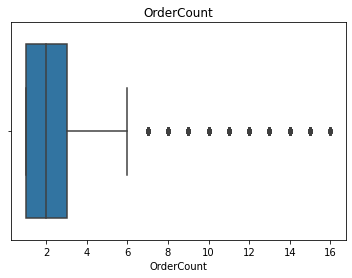

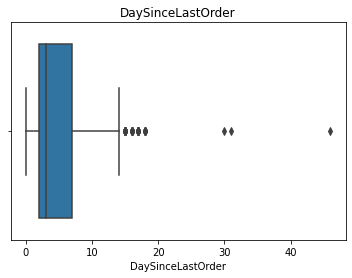

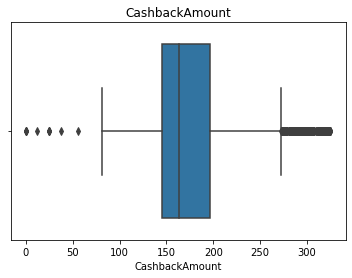

In [8]:
# Loop over the columns in the DataFrame
for i in df.columns:
  # Check if the data type of the column is int64 or float64
  if((df[i].dtype == 'int64') | (df[i].dtype == 'float64')):
    # Set the title of the plot to the name of the column
    plt.title(i)
    # Create a box plot of the column
    sns.boxplot(df[i])
    # Show the plot
    plt.show()


#### Missing Values 

In [9]:
# Check missing values in dataset
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [10]:
# Loop over the columns in the DataFrame
for i in df.columns:
  # Check if there are any missing values in the column
  if (df[i].isnull().sum() > 0):
    # Calculate the percentage of missing values
    misval = (df[i].isnull().sum()) / (len(df[i])) * 100
    # Print the name of the column and the percentage of missing values
    print(f'{i} Perc. Mis Val = {misval:.2f} %')


Tenure Perc. Mis Val = 4.69 %
WarehouseToHome Perc. Mis Val = 4.46 %
HourSpendOnApp Perc. Mis Val = 4.53 %
OrderAmountHikeFromlastYear Perc. Mis Val = 4.71 %
CouponUsed Perc. Mis Val = 4.55 %
OrderCount Perc. Mis Val = 4.58 %
DaySinceLastOrder Perc. Mis Val = 5.45 %


#### Duplicated Data

In [11]:
# Check duplicated values in dataset 
df.duplicated().sum()

0

#### Check Object Feature Cardinily 

In [12]:
# Initialize lists to store categorical and numerical features
catfeat = []
numfeat = []

# Loop over the columns in the DataFrame
for i in df.columns:
  # Check if the column is of type 'object'
  if (df[i].dtype == 'object'):
    # Print the name of the column and the number of unique labels
    print(f'{i} : {df[i].nunique()} labels')

PreferredLoginDevice : 3 labels
PreferredPaymentMode : 7 labels
Gender : 2 labels
PreferedOrderCat : 6 labels
MaritalStatus : 3 labels


**Insights**
- The data consists of 5 categorical & 15 numerical features with 5630 rows of data.
- `Cashbackamount` feature relatively has high significance number of outliers compared to others.
- From 20 features, we have 7 features with missing values proportion > 4%.
- There is no duplicated data in this dataset. Even in customerID features.
- `PreferredPaymentMode` and `PreferredOrderCat` relaively has high cardinality compared to others.

### Exploratory Data Analysis
- Our main question was 'What factors caused our customer retent and turn into Company X'
- So we will focusing on our target `Churn` and how they related to other features

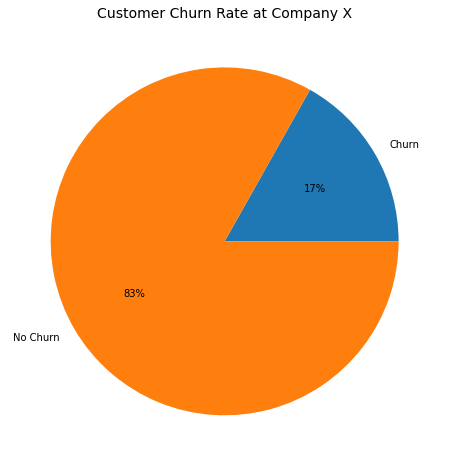

In [13]:
churn, nochurn = (df['Churn'] == 1).sum(), (df['Churn'] == 0).sum() 
labels = ['Churn', 'No Churn']

# plotting data on chart
fig = plt.figure(figsize = (10, 8))
plt.title('Customer Churn Rate at Company X', size = 14)

plt.pie([churn, nochurn], labels= labels,autopct='%.0f%%')

# displaying chart
plt.show()

In [14]:
# Feature Lists of Customer Demography
custdemo = [ 'CityTier', 'Gender', 'MaritalStatus', 'NumberOfAddress', 'NumberOfDeviceRegistered','WarehouseToHome']
# Feature Lists of Customer Purchasing Behaviour
custbehv = [ 'Tenure', 'PreferredLoginDevice', 'PreferredPaymentMode', 'HourSpendOnApp', 'PreferedOrderCat', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 
            'DaySinceLastOrder', 'CashbackAmount']
# Feature List of Customer Compliance
custcompl = ['SatisfactionScore', 'Complain']

#### Customer Demographies

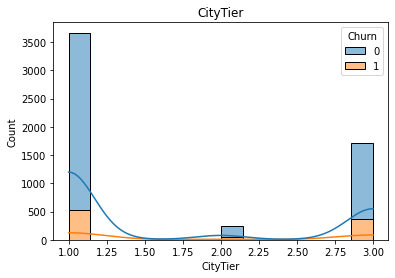

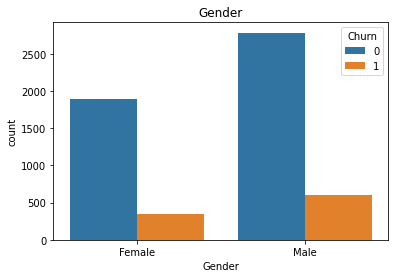

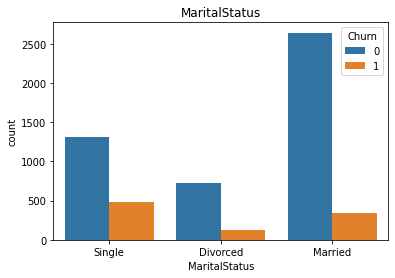

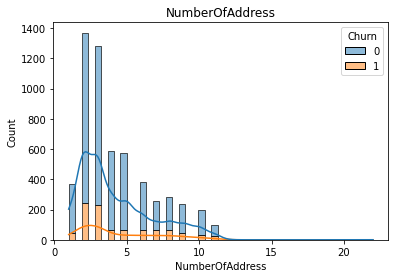

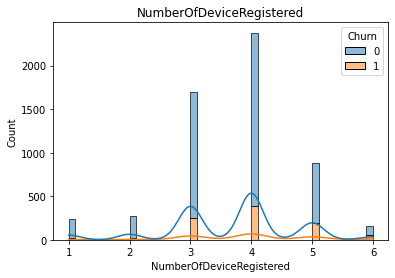

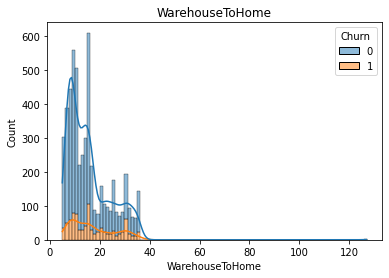

In [15]:
# This code is checking for each feature in the 'custdemo' dataframe and plotting the data based on its datatype
for i in df[custdemo].columns:
  # Checking if the datatype of the feature is 'object'
  if(df[i].dtype == 'object'):    
    # Setting the title of the plot as the name of the feature
    plt.title(i)
    # Plotting a countplot of the feature with the hue being 'Churn'
    sns.countplot(df[i], hue = df['Churn'], dodge=True)
    # Displaying the plot
    plt.show()
  # If the datatype is not 'object'
  else:
    # Setting the title of the plot as the name of the feature
    plt.title(i)
    # Plotting a histplot of the feature with the hue being 'Churn' and showing a kernel density estimate
    sns.histplot(x=df[i], hue = df['Churn'], data = df, multiple = 'stack', kde=True)
    # Displaying the plot
    plt.show()

**Results**
- CityTier : Frequency of churn higher in City Tier 1 
- Gender : Frequency of churn higher came from male customer
- MaritalStatus : Frequency of churn higher came from single customer
- NumberofAddress : Frequency of churn higher came from 2 & 3 number of address customer
- NumberofDevice : Frequency of churn higher came from customer with 3, 4 & 5 devices
- WarehouseToHome : Frequency of churn higher came from customer whose house close warehouse 

#### Customer Behaviours 

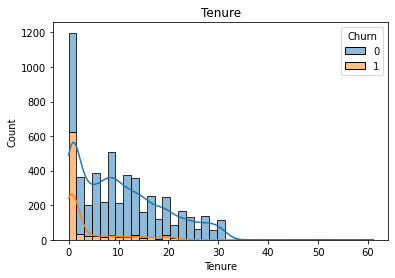

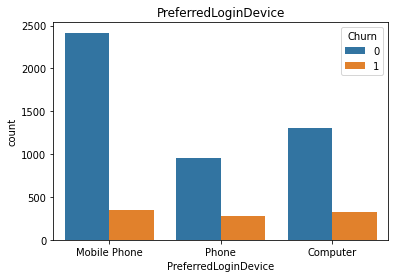

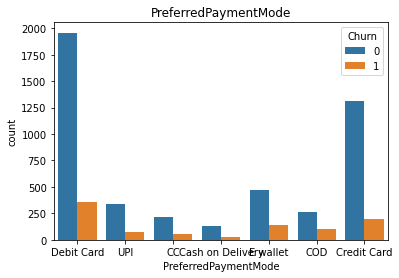

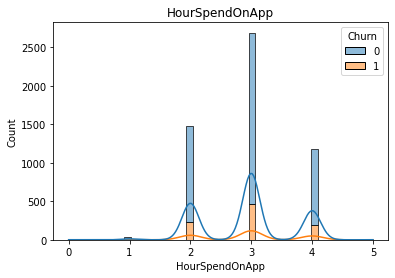

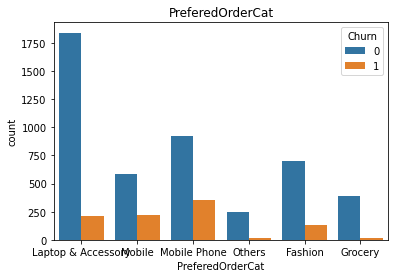

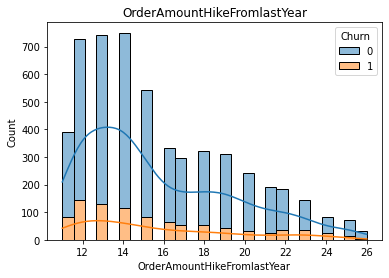

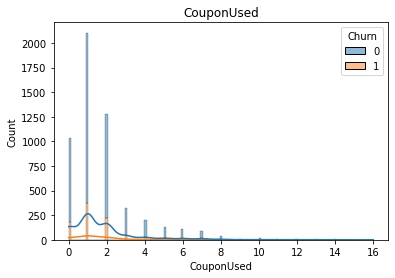

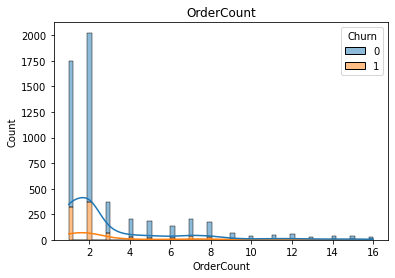

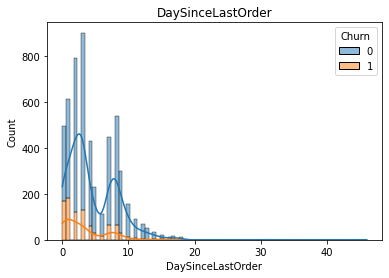

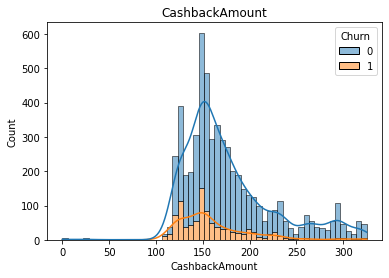

In [16]:
# loop through columns in the customer behavior dataframe
for i in df[custbehv].columns:
  # check if the column data type is object
  if(df[i].dtype == 'object'):
    # set the title of the plot to the column name
    plt.title(i)
    # create a countplot using seaborn library
    sns.countplot(df[i], hue = df['Churn'])
    # show the plot
    plt.show()
  # if the column data type is not object
  else:
    # set the title of the plot to the column name
    plt.title(i)
    # create a histplot using seaborn library
    sns.histplot(x=df[i], hue = df['Churn'], data = df, multiple = 'stack', kde=True)
    # show the plot
    plt.show()


**Results**
1. Tenure : Frequency of higher churn came from new customer (tenure = 0)
2. PreferredLoginDevice : There is no singificant difference between all devices
3. PreferredPaymentMethid : : Frequency of higher churn came from customer paying with debit card 
4. HoursSpendonApp : Frequency of higher churn came from customer spending 3 hours using the app
5. PreferredOrderCat : Frequency of higher churn came from customer preferring mobile phone
6. OrderAmountHikeFromLastYear : Frequency of higher churn came from customer has 12 & 14 amount of order hike from last year 
7. CouponUsed : Frequency of higher churn came from customer using 1 coupon
8. OrderCount : Frequency of higher churn came from customer ordering 2 items
9. DaySinceLastOrder : Frequency of higher churn came from customer who in last 0 and 1 day ordering items 
10. CasbackAmount : Frequency of higher churn came from customer who spend 150$ cashback amount 



#### Customer Complains

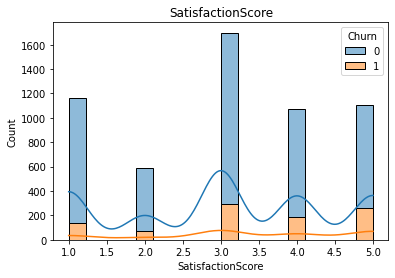

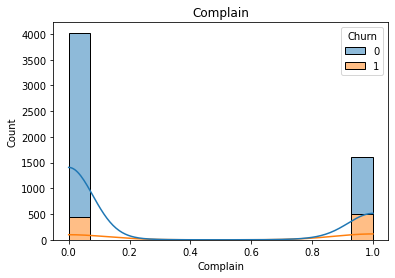

In [17]:
# Plotting features in the "custcompl" dataframe with respect to target variable "Churn"
for i in df[custcompl].columns:
    # If the feature type is "object", use countplot
    if(df[i].dtype == 'object'):
        plt.title(i)
        sns.countplot(df[i], hue = df['Churn'])
        plt.show()
    # If the feature type is not "object", use histplot
    else:
        plt.title(i)
        sns.histplot(x=df[i], hue = df['Churn'], data = df, multiple = 'stack', kde=True)
        plt.show()


**Results**
1. SatisfactionScore : Frequency of higher churn came from customer give 3.0 satisfaction score
2. Complain : Frequency of higher churn came from customer give complain

#### Correlation 

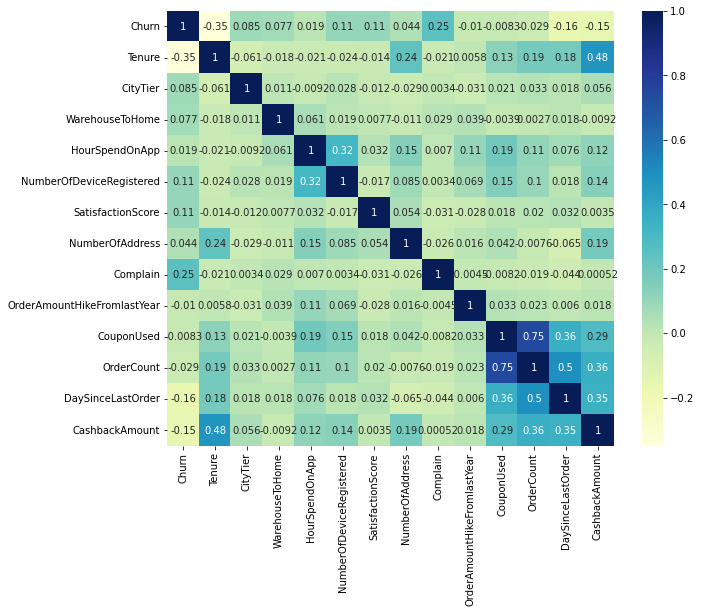

In [18]:
# Removing the 'CustomerID' column from the dataframe
df = df.drop('CustomerID', axis=1)

# Setting the size of the figure for the heatmap
fig = plt.figure(figsize= (10, 8))

# Plotting the correlation heatmap using seaborn library
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# Displaying the heatmap
plt.show()


**Results**
- There is high correlation between OrderCount and CoupunUsed 
- There is moderate correlation between CashbackAmount and Tenure & Tenure & Cashback Amount
- After seen the data, We will remove CoupunUsed and Tenure because of high correlation 

In [19]:
df = df.drop(['CouponUsed', 'Tenure'], axis=1)

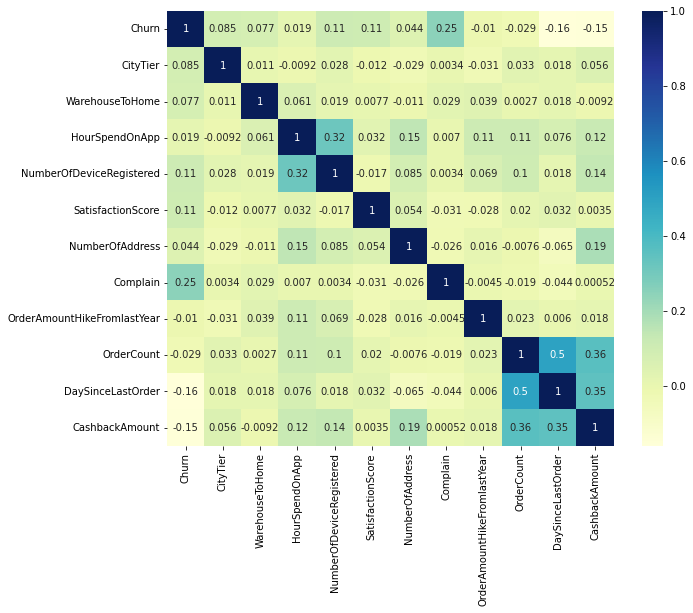

In [20]:
# plotting correlation heatmap
fig = plt.figure(figsize= (10, 8))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

Now as we seen on the correlation heatmap above, we have remove all highly correlated features from our dataset. We will move to preprocessing data.

### Data Cleaning 


#### Outliers : IQR Methods
We will using IQR methods for detecting outliers on `Cashbackamount`

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   PreferredLoginDevice         5630 non-null   object 
 2   CityTier                     5630 non-null   int64  
 3   WarehouseToHome              5379 non-null   float64
 4   PreferredPaymentMode         5630 non-null   object 
 5   Gender                       5630 non-null   object 
 6   HourSpendOnApp               5375 non-null   float64
 7   NumberOfDeviceRegistered     5630 non-null   int64  
 8   PreferedOrderCat             5630 non-null   object 
 9   SatisfactionScore            5630 non-null   int64  
 10  MaritalStatus                5630 non-null   object 
 11  NumberOfAddress              5630 non-null   int64  
 12  Complain                     5630 non-null   int64  
 13  OrderAmountHikeFro

In [22]:
df2 = df.copy()

In [23]:
# Calculating the interquartile range (IQR) of the column 'CashbackAmount' in the dataframe df2
# 25th percentile value
q25 = percentile(df2['CashbackAmount'], 25) 
# 75th percentile value
q75 = percentile(df2['CashbackAmount'], 75)
# Interquartile range
iqr = q75 - q25

# Calculating the cutoff value using 1.5 times the IQR
cutoff = 1.5 * iqr
# Calculating the lower limit using the 25th percentile value minus the cutoff value
lower = q25 - cutoff
# Calculating the upper limit using the 75th percentile value plus the cutoff value
upper = q75 + cutoff

# Printing the lower and upper limits
print(f'The Lower Limit is : {lower}, The Upper Limit is : {upper}')

The Lower Limit is : 69.83625, The Upper Limit is : 272.32625


In [24]:
print('The Number of Above Upper Limits :' ,len(df2[df2['CashbackAmount'] > upper]))
print('The Number of Below Lower Limits :' ,len(df2[df2['CashbackAmount'] < lower]))

The Number of Above Upper Limits : 427
The Number of Below Lower Limits : 11


In [25]:
median = np.median(df2['CashbackAmount'])

In [26]:
df2['CashbackAmount'] = np.where(df2['CashbackAmount'] > upper, median, df2['CashbackAmount'])

In [27]:
df = df2.copy()

#### Missing Values : Remove > 5% and Replacing < 5% With Median / Mode

In [28]:
# Loop over the columns in the DataFrame
for i in df2.columns:
  # Check if there are any missing values in the column
  if (df2[i].isnull().sum() > 0):
    # Calculate the percentage of missing values
    misval = (df2[i].isnull().sum()) / (len(df2[i])) * 100
    # Print the name of the column and the percentage of missing values
    print(f'{i} Perc. Mis Val = {misval:.2f}%. Data Types : {df2[i].dtypes}')


WarehouseToHome Perc. Mis Val = 4.46%. Data Types : float64
HourSpendOnApp Perc. Mis Val = 4.53%. Data Types : float64
OrderAmountHikeFromlastYear Perc. Mis Val = 4.71%. Data Types : float64
OrderCount Perc. Mis Val = 4.58%. Data Types : float64
DaySinceLastOrder Perc. Mis Val = 5.45%. Data Types : float64


In [29]:
df2.drop(['DaySinceLastOrder'], axis=1, inplace=True)

In [30]:
# initializing empty list to store column names with missing values
misval = []

# looping through each column in dataframe df2
for i in df2.columns:
  # checking if there are any missing values in the column
  if ( df2[i].isnull().sum() != 0 ):
    # if missing values found, appending column name to list
    misval.append(i)

In [31]:
df2.drop(misval, axis=1, inplace=True)

In [32]:
df = df2.copy()

#### Data Cardinality

In [33]:
for i in df2.columns:
  if (df2[i].dtypes == 'object'):
    print(f'{i} Number of Unique Values {df2[i].nunique()}  ')

PreferredLoginDevice Number of Unique Values 3  
PreferredPaymentMode Number of Unique Values 7  
Gender Number of Unique Values 2  
PreferedOrderCat Number of Unique Values 6  
MaritalStatus Number of Unique Values 3  


In [34]:
for i in df2.columns:
  if ( (df2[i].dtypes == 'object') & (df2[i].nunique() > 5) ):
    print(f'{i}\n {df[i].value_counts()} ')
    print('\n')

PreferredPaymentMode
 Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64 


PreferedOrderCat
 Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64 




In [35]:
df = df2.copy()

After checking the high cardinal features, i think there is no need for reducing the number of unique values. Because the categorization was comprehensive and there is no extreme number of each unique valuess that possibled to aggregated. 

### Data Preprocessing 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     5630 non-null   int64  
 1   PreferredLoginDevice      5630 non-null   object 
 2   CityTier                  5630 non-null   int64  
 3   PreferredPaymentMode      5630 non-null   object 
 4   Gender                    5630 non-null   object 
 5   NumberOfDeviceRegistered  5630 non-null   int64  
 6   PreferedOrderCat          5630 non-null   object 
 7   SatisfactionScore         5630 non-null   int64  
 8   MaritalStatus             5630 non-null   object 
 9   NumberOfAddress           5630 non-null   int64  
 10  Complain                  5630 non-null   int64  
 11  CashbackAmount            5630 non-null   float64
dtypes: float64(1), int64(6), object(5)
memory usage: 527.9+ KB


#### Feature Scaling 

In [37]:
df['Churn'] = df['Churn'].astype('object')

In [38]:
colnames = df.columns
num_columns = df.select_dtypes(include=['float', 'int']).columns
df[num_columns] = StandardScaler().fit_transform(df[num_columns])

In [39]:
df_new = pd.DataFrame(data=df, columns=colnames)

In [40]:
df_new.head()

,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,CashbackAmount
0,1,Mobile Phone,1.469771,Debit Card,Female,-0.67290,Laptop & Accessory,-0.772992,Single,1.852616,1.584290,-0.203103
1,1,Phone,-0.715286,UPI,Male,0.30375,Mobile,-0.048392,Single,1.078430,1.584290,-1.331725
2,1,Phone,-0.715286,Debit Card,Male,0.30375,Mobile,-0.048392,Single,0.691336,1.584290,-1.349653
3,1,Phone,1.469771,Debit Card,Male,0.30375,Laptop & Accessory,1.400807,Single,1.465523,-0.631198,-0.950891
4,1,Phone,-0.715286,CC,Male,-0.67290,Mobile,1.400807,Single,-0.469944,-0.631198,-1.080149


In [41]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     5630 non-null   object 
 1   PreferredLoginDevice      5630 non-null   object 
 2   CityTier                  5630 non-null   float64
 3   PreferredPaymentMode      5630 non-null   object 
 4   Gender                    5630 non-null   object 
 5   NumberOfDeviceRegistered  5630 non-null   float64
 6   PreferedOrderCat          5630 non-null   object 
 7   SatisfactionScore         5630 non-null   float64
 8   MaritalStatus             5630 non-null   object 
 9   NumberOfAddress           5630 non-null   float64
 10  Complain                  5630 non-null   float64
 11  CashbackAmount            5630 non-null   float64
dtypes: float64(6), object(6)
memory usage: 527.9+ KB


#### Feature Encoding

In [42]:
for i in df_new.columns:
  if(df_new[i].dtypes == 'object'):
    print(i)
    print(df_new[i].nunique())

Churn
2
PreferredLoginDevice
3
PreferredPaymentMode
7
Gender
2
PreferedOrderCat
6
MaritalStatus
3


In [43]:
le = LabelEncoder()
df_new['Gender'] = le.fit_transform(df_new['Gender'])
df_new['Churn'] = le.fit_transform(df_new['Churn'])

In [44]:
df_new.head()

,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,CashbackAmount
0,1,Mobile Phone,1.469771,Debit Card,0,-0.67290,Laptop & Accessory,-0.772992,Single,1.852616,1.584290,-0.203103
1,1,Phone,-0.715286,UPI,1,0.30375,Mobile,-0.048392,Single,1.078430,1.584290,-1.331725
2,1,Phone,-0.715286,Debit Card,1,0.30375,Mobile,-0.048392,Single,0.691336,1.584290,-1.349653
3,1,Phone,1.469771,Debit Card,1,0.30375,Laptop & Accessory,1.400807,Single,1.465523,-0.631198,-0.950891
4,1,Phone,-0.715286,CC,1,-0.67290,Mobile,1.400807,Single,-0.469944,-0.631198,-1.080149


In [45]:
df_new = pd.get_dummies(df_new)

In [46]:
df_new.head()

,Churn,CityTier,Gender,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,1.469771,0,-0.67290,-0.772992,1.852616,1.584290,-0.203103,0,1,...,0,0,0,1,0,0,0,0,0,1
1,1,-0.715286,1,0.30375,-0.048392,1.078430,1.584290,-1.331725,0,0,...,1,0,0,0,1,0,0,0,0,1
2,1,-0.715286,1,0.30375,-0.048392,0.691336,1.584290,-1.349653,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,1.469771,1,0.30375,1.400807,1.465523,-0.631198,-0.950891,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,-0.715286,1,-0.67290,1.400807,-0.469944,-0.631198,-1.080149,0,0,...,0,0,0,0,1,0,0,0,0,1


#### Data Splitting

In [47]:
X = df_new.drop('Churn', axis=1)
y = df_new['Churn']

In [48]:
X.head()

,CityTier,Gender,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.469771,0,-0.67290,-0.772992,1.852616,1.584290,-0.203103,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,-0.715286,1,0.30375,-0.048392,1.078430,1.584290,-1.331725,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,-0.715286,1,0.30375,-0.048392,0.691336,1.584290,-1.349653,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,1.469771,1,0.30375,1.400807,1.465523,-0.631198,-0.950891,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,-0.715286,1,-0.67290,1.400807,-0.469944,-0.631198,-1.080149,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

#### Class Balancing Operations 

In [50]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

#### Import Lazypredict 

In [51]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:13<00:00,  2.21it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.96,0.93,0.93,0.96,0.05
ExtraTreesClassifier,0.95,0.86,0.86,0.94,0.74
BaggingClassifier,0.94,0.86,0.86,0.94,0.16
ExtraTreeClassifier,0.92,0.86,0.86,0.92,0.03
LabelPropagation,0.92,0.85,0.85,0.92,2.13
LabelSpreading,0.92,0.85,0.85,0.92,2.04
RandomForestClassifier,0.94,0.84,0.84,0.94,0.55
LGBMClassifier,0.91,0.77,0.77,0.90,0.33
NearestCentroid,0.72,0.73,0.73,0.75,0.03


In [53]:
model_name = models.index.to_list()
score1 = models['ROC AUC'].values
score2 = models['Balanced Accuracy'].values

model_score = pd.DataFrame({'Model' : model_name, 'ROC AUC' : score1, 'Balanced Accuracy' : score2})

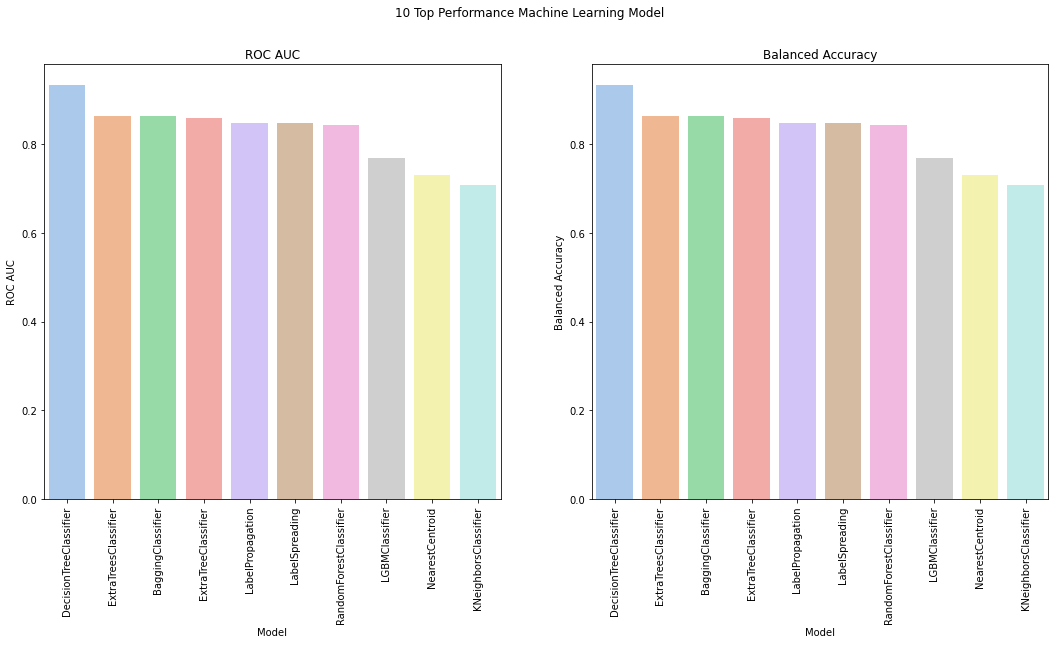

In [54]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
plt.suptitle('10 Top Performance Machine Learning Model')

ax[0] = sns.barplot(data = model_score.sort_values(by = 'ROC AUC', ascending=False)[0:10], x = 'Model', y = 'ROC AUC', ax = ax[0], palette = 'pastel')
ax[0].set_title('ROC AUC')
ax[1] = sns.barplot(data = model_score.sort_values(by = 'Balanced Accuracy', ascending=False)[0:10], x = 'Model', y = 'Balanced Accuracy', ax= ax[1], palette = 'pastel')
ax[1].set_title('Balanced Accuracy')

for label in ax[0].get_xticklabels():
    label.set_rotation(90)
for label in ax[1].get_xticklabels():
    label.set_rotation(90)

plt.show()

### Model Training
We will select 3 best performer model into voting classifier (1) DecsionTreeClassifier, (2) ExtraTreesClassifier and (3) BaggingClassifier

In [55]:
clf1 = ExtraTreesClassifier(random_state=42)
clf2 = BaggingClassifier(random_state=42)
clf3 = DecisionTreeClassifier(random_state=42)

In [56]:
model = VotingClassifier(estimators = [
    ('etc', clf1), ('bc', clf2), ('dt', clf3)], voting = 'soft')

In [57]:
model.fit(X_train, y_train)

VotingClassifier(estimators=[('etc', ExtraTreesClassifier(random_state=42)),
                             ('bc', BaggingClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [58]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)

In [59]:
y_pred = model.predict(X_test)

### Model Evaluation 

#### ROC AUC Score

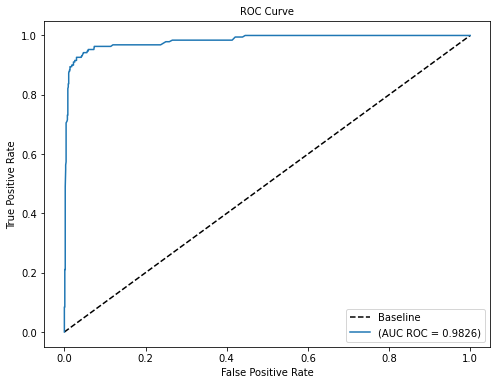

In [60]:
# create a plot
ax, fig = plt.subplots(figsize=(8,6))

# create a baseline 
plt.plot([0,1], [0,1], linestyle='--', label='Baseline', color = 'black')

y_probs = model.predict_proba(X_test)
y_probs = y_probs[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = round(roc_auc_score(y_test, y_probs), 4)

plt.plot(fpr, tpr, label = (f'(AUC ROC = {auc:.4f})'))
plt.legend(loc='best')

# set plot axises
plt.ylabel('True Positive Rate', size = 10)
plt.xlabel('False Positive Rate', size = 10)
plt.title('ROC Curve', size=10)
plt.legend()

# show the plot
plt.show()

#### Classification Report 

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       936
           1       0.93      0.88      0.91       190

    accuracy                           0.97      1126
   macro avg       0.95      0.94      0.94      1126
weighted avg       0.97      0.97      0.97      1126



### Gathering Conclusions
1. We successfully exceed our AUC ROC score minimum target with AUC ROC Score 0.98
2. Classification report result show a promising result for our model with recall score and f1 score for 'churn' and 'no churn' were above 85%
3. Futher improvement effort for this notebook will be performed in the future